In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import random

from sklearn.ensemble import RandomForestRegressor

from artemis.interactions_methods.model_agnostic import FriedmanHStatisticMethod

import sys
sys.path.append('../')
import utils

## Data and model

In [2]:
#import dataset
data = pd.read_csv("../../data/abalone.data",
                  names=["sex","length","diameter","height","whole weight",
                         "shucked weight","viscera weight","shell weight","rings"])

data.head()

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
y = data["rings"]
X = data[["sex", "length", "height", "shucked weight", "viscera weight", "shell weight"]]

#Create dummy variables
X['sex.M'] = [1 if s == 'M' else 0 for s in X['sex']]
X['sex.F'] = [1 if s == 'F' else 0 for s in X['sex']]
X['sex.I'] = [1 if s == 'I' else 0 for s in X['sex']]
X = X.drop('sex', axis=1)

X.head()

/var/folders/_j/wkrsnnnn2lj6cds3dhhlkkh40000gn/T/ipykernel_94226/580131924.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sex.M'] = [1 if s == 'M' else 0 for s in X['sex']]
/var/folders/_j/wkrsnnnn2lj6cds3dhhlkkh40000gn/T/ipykernel_94226/580131924.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sex.F'] = [1 if s == 'F' else 0 for s in X['sex']]


,length,height,shucked weight,viscera weight,shell weight,sex.M,sex.F,sex.I
0,0.455,0.095,0.2245,0.1010,0.150,1,0,0
1,0.350,0.090,0.0995,0.0485,0.070,1,0,0
2,0.530,0.135,0.2565,0.1415,0.210,0,1,0
3,0.440,0.125,0.2155,0.1140,0.155,1,0,0
4,0.330,0.080,0.0895,0.0395,0.055,0,0,1


In [4]:
#Train model
model = RandomForestRegressor()
model.fit(X, y)

RandomForestRegressor()

## Friedman H-statistic

In [44]:
# Get random selection of 100 observations
random.seed(8)
X_exp = random.choices(X.to_numpy(), k=100)
X_exp = pd.DataFrame(X_exp, columns=X.columns)

In [45]:
# Calculate Friedman H statistic
h_stat = FriedmanHStatisticMethod()
h_stat.fit(model, X_exp) 

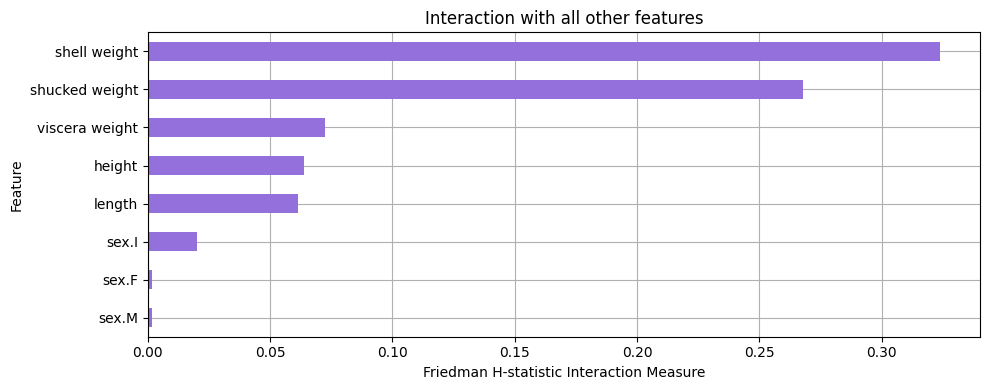

In [50]:
# Overall interaction plot
fig, ax = plt.subplots(figsize=(10, 4))
h_stat.plot('bar_chart_ova',ax=ax)

# Save figure
utils.save_fig("MA3_overall_interaction_plot")

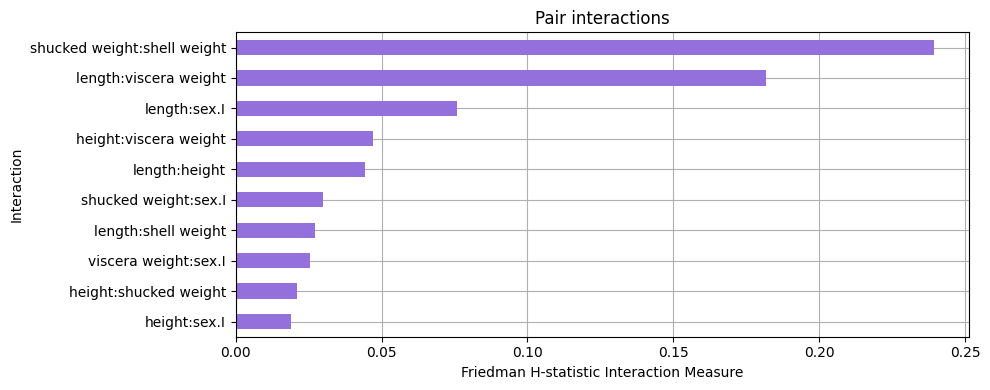

In [51]:
# Pairwise interactions
fig, ax = plt.subplots(figsize=(10, 4))
h_stat.plot(vis_type='bar_chart',ax=ax)

# Save figure
utils.save_fig("MA3_pairwise_interaction_plot")

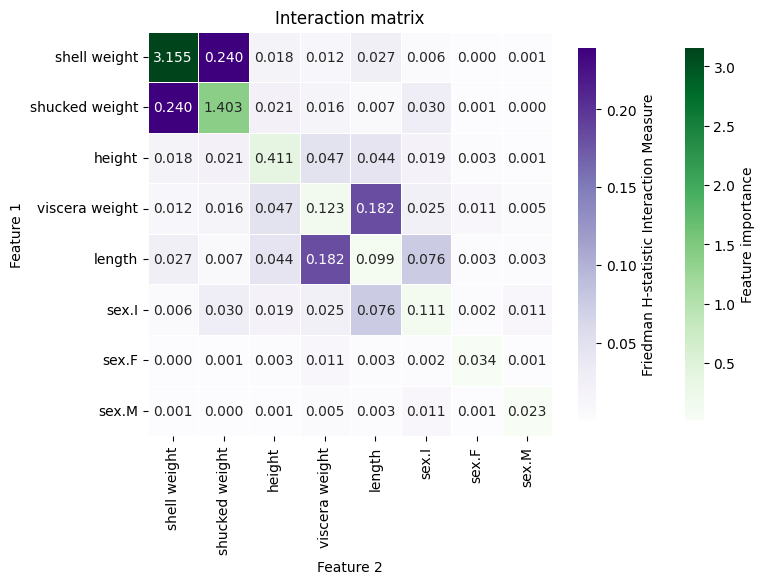

In [48]:
# Interaction heatmap
h_stat.plot()

# Save figure
utils.save_fig("MA3_heatmap")

## Unnormalized H-statistic

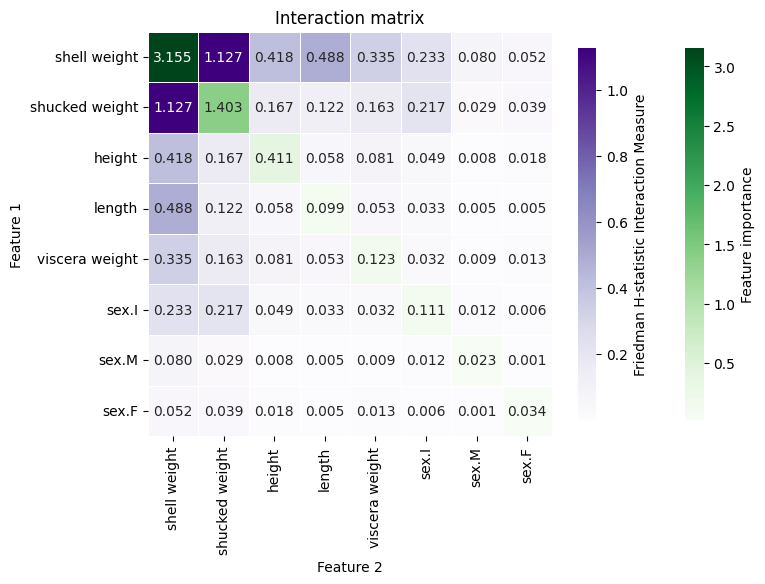

In [49]:
h_stat_unnormalized = FriedmanHStatisticMethod(normalized=False)
h_stat_unnormalized.fit(model, X_exp) 

# Plot heatmap
h_stat_unnormalized.plot()

# Save figure
utils.save_fig("MA3_unnormalized_heatmap")

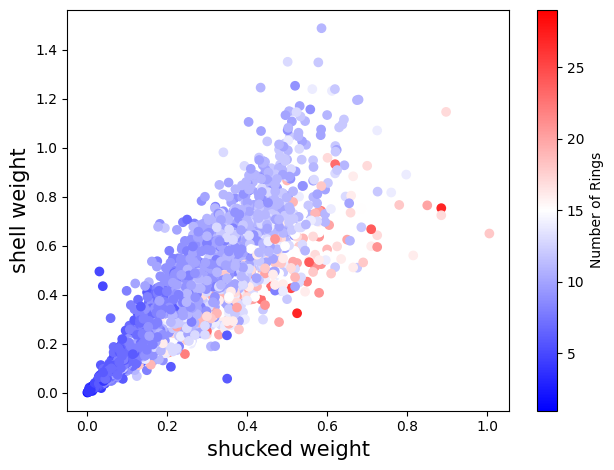

In [24]:
# Interaction between shell weight and shucked weight
plt.scatter(X["shell weight"], X["shucked weight"], c=y, cmap="bwr")
plt.colorbar(label="Number of Rings", orientation="vertical")

plt.xlabel("shucked weight", size=15)
plt.ylabel("shell weight", size=15)

# Save figure
utils.save_fig("MA3_scatterplot")